<a href="https://colab.research.google.com/github/Francisco2963/MLP_con_Early_Stopping_y_Dropout_-Core-/blob/main/MLP_con_Early_Stopping_y_Dropout_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


id(Identificación única para cada paciente)

age(Edad del paciente en años)

origin(lugar de estudio)

sex(Masculino/Femenino)

cpTipo de dolor torácico ([angina típica, angina atípica, no anginosa, asintomática])

trestbpsPresión arterial en reposo (presión arterial en reposo (en mm Hg al ingreso al hospital))

chol(colesterol sérico en mg/dl)

fbs(si el nivel de azúcar en sangre en ayunas es > 120 mg/dl)

restecg (resultados electrocardiográficos en reposo)
-- Valores: [normal, anomalía de la presión arterial sistólica, hipertrofia del ventrículo izquierdo]

thalach: frecuencia cardíaca máxima alcanzada

exang:angina inducida por el ejercicio (Verdadero/Falso)

oldpeak:Depresión del segmento ST inducida por el ejercicio en relación con el reposo

slope:la pendiente del segmento ST del ejercicio máximo

ca: número de vasos principales (0-3) coloreados mediante fluoroscopia

thal: [normal; defecto fijo; defecto reversible]

num:el atributo predicho

In [7]:
df['num'].unique()  # variable objetivo

array([0, 2, 1, 3, 4])

In [8]:
df['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [9]:
df_angina_tipica = df[df['cp'] == 'typical angina']
df_angina_tipica.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
20,21,64,Male,Cleveland,typical angina,110.0,211.0,False,lv hypertrophy,144.0,True,1.8,flat,0.0,normal,0
21,22,58,Female,Cleveland,typical angina,150.0,283.0,True,lv hypertrophy,162.0,False,1.0,upsloping,0.0,normal,0
27,28,66,Female,Cleveland,typical angina,150.0,226.0,False,normal,114.0,False,2.6,downsloping,0.0,normal,0
30,31,69,Female,Cleveland,typical angina,140.0,239.0,False,normal,151.0,False,1.8,upsloping,2.0,normal,0


In [10]:
df['trestbps'].unique()

array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
       112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
       108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
       101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
       146., 106., 156., 154., 114., 164.,  98., 190.,  nan, 113.,  92.,
        95.,  80., 185., 116.,   0.,  96., 127.])

In [11]:
df['chol'].unique()

array([233., 286., 229., 250., 204., 236., 268., 354., 254., 203., 192.,
       294., 256., 263., 199., 168., 239., 275., 266., 211., 283., 284.,
       224., 206., 219., 340., 226., 247., 167., 230., 335., 234., 177.,
       276., 353., 243., 225., 302., 212., 330., 175., 417., 197., 198.,
       290., 253., 172., 273., 213., 305., 216., 304., 188., 282., 185.,
       232., 326., 231., 269., 267., 248., 360., 258., 308., 245., 270.,
       208., 264., 321., 274., 325., 235., 257., 164., 141., 252., 255.,
       201., 222., 260., 182., 303., 265., 309., 307., 249., 186., 341.,
       183., 407., 217., 288., 220., 209., 227., 261., 174., 281., 221.,
       205., 240., 289., 318., 298., 564., 246., 322., 299., 300., 293.,
       277., 214., 207., 223., 160., 394., 184., 315., 409., 244., 195.,
       196., 126., 313., 259., 200., 262., 215., 228., 193., 271., 210.,
       327., 149., 295., 306., 178., 237., 218., 242., 319., 166., 180.,
       311., 278., 342., 169., 187., 157., 176., 24

In [12]:
df['fbs'].unique()

array([True, False, nan], dtype=object)

In [13]:
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality', nan], dtype=object)

In [14]:
df['thalch'].unique()

array([150., 108., 129., 187., 172., 178., 160., 163., 147., 155., 148.,
       153., 142., 173., 162., 174., 168., 139., 171., 144., 132., 158.,
       114., 151., 161., 179., 120., 112., 137., 157., 169., 165., 123.,
       128., 152., 140., 188., 109., 125., 131., 170., 113.,  99., 177.,
       141., 180., 111., 143., 182., 156., 115., 149., 145., 146., 175.,
       186., 185., 159., 130., 190., 136.,  97., 127., 154., 133., 126.,
       202., 103., 166., 164., 184., 124., 122.,  96., 138.,  88., 105.,
       194., 195., 106., 167.,  95., 192., 117., 121., 116.,  71., 118.,
       181., 134.,  90.,  98., 176., 135., 110.,  nan, 100.,  87., 102.,
        92.,  91.,  82., 119.,  94., 104.,  60.,  83.,  63.,  70.,  77.,
        72.,  78.,  86.,  93.,  67.,  84.,  80., 107.,  69.,  73.])

In [15]:
df['exang'].unique()

array([False, True, nan], dtype=object)

In [16]:
df['oldpeak'].unique()

array([ 2.3,  1.5,  2.6,  3.5,  1.4,  0.8,  3.6,  0.6,  3.1,  0.4,  1.3,
        0. ,  0.5,  1.6,  1. ,  1.2,  0.2,  1.8,  3.2,  2.4,  2. ,  2.5,
        2.2,  2.8,  3. ,  3.4,  6.2,  4. ,  5.6,  2.9,  0.1,  2.1,  1.9,
        4.2,  0.9,  1.1,  3.8,  0.7,  0.3,  4.4,  5. ,  nan, -1.1, -1.5,
       -0.1, -2.6, -0.7, -2. , -1. ,  1.7, -0.8, -0.5, -0.9,  3.7])

In [17]:
df['slope'].unique()

array(['downsloping', 'flat', 'upsloping', nan], dtype=object)

In [18]:
df['ca'].unique()

array([ 0.,  3.,  2.,  1., nan])

In [19]:
df['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect', nan], dtype=object)

In [20]:
df[df['trestbps'].isnull()]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
393,394,48,Female,Hungary,atypical angina,NaN,308.0,False,st-t abnormality,NaN,NaN,2.0,upsloping,NaN,NaN,0
599,600,35,Male,Switzerland,asymptomatic,NaN,0.0,NaN,normal,130.0,True,NaN,NaN,NaN,reversable defect,3
714,715,69,Male,Switzerland,asymptomatic,NaN,0.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,reversable defect,3
733,734,63,Male,VA Long Beach,non-anginal,NaN,0.0,False,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,1
743,744,74,Male,VA Long Beach,non-anginal,NaN,0.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN,0
746,747,51,Male,VA Long Beach,asymptomatic,NaN,0.0,True,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,2
749,750,55,Male,VA Long Beach,non-anginal,NaN,228.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,3
750,751,54,Male,VA Long Beach,asymptomatic,NaN,0.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,3
756,757,60,Male,VA Long Beach,asymptomatic,NaN,281.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,2
758,759,58,Male,VA Long Beach,asymptomatic,NaN,203.0,True,normal,NaN,NaN,NaN,NaN,NaN,NaN,1


In [21]:
Total_perdidos = df.iloc[775:782]
Total_perdidos

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
775,776,68,Male,VA Long Beach,asymptomatic,138.0,0.0,False,normal,130.0,True,3.0,flat,NaN,NaN,2
776,777,53,Male,VA Long Beach,asymptomatic,154.0,0.0,NaN,st-t abnormality,140.0,True,1.5,flat,NaN,NaN,2
777,778,60,Male,VA Long Beach,non-anginal,NaN,316.0,True,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,3
778,779,62,Male,VA Long Beach,atypical angina,NaN,0.0,False,normal,NaN,NaN,NaN,NaN,NaN,NaN,0
779,780,59,Male,VA Long Beach,asymptomatic,178.0,0.0,True,lv hypertrophy,120.0,True,0.0,NaN,NaN,reversable defect,1
780,781,51,Male,VA Long Beach,asymptomatic,NaN,218.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
781,782,61,Male,VA Long Beach,asymptomatic,110.0,0.0,NaN,normal,108.0,True,2.0,downsloping,NaN,NaN,2


In [22]:
from sklearn.experimental import enable_iterative_imputer  # Necesario para habilitar IterativeImputer
from sklearn.impute import IterativeImputer
import pandas as pd

In [23]:
# Obtener las columnas numéricas
columnas_numericas = df.select_dtypes(include='number').columns

# Obtener las columnas categóricas
columnas_categoricas = df.select_dtypes(include='object').columns

imputer = IterativeImputer(random_state=0)

# Imputar columnas numéricas
df_imputado_numerico = imputer.fit_transform(df[columnas_numericas])

# Imputar columnas categóricas
# Aquí, simplemente rellenaremos los valores faltantes con la moda de la columna:
df_imputado_categorico = df[columnas_categoricas].fillna(df[columnas_categoricas].mode().iloc[0])

# Combinar los resultados
df_imputado = pd.concat([pd.DataFrame(df_imputado_numerico, columns=columnas_numericas), df_imputado_categorico], axis=1)


<ipython-input-23-29e152185c2e>:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_imputado_categorico = df[columnas_categoricas].fillna(df[columnas_categoricas].mode().iloc[0])


In [24]:
df_imputado.isnull().sum()

,0
id,0
age,0
trestbps,0
chol,0
thalch,0
oldpeak,0
ca,0
num,0
sex,0
dataset,0


In [25]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    float64
 1   age       920 non-null    float64
 2   trestbps  920 non-null    float64
 3   chol      920 non-null    float64
 4   thalch    920 non-null    float64
 5   oldpeak   920 non-null    float64
 6   ca        920 non-null    float64
 7   num       920 non-null    float64
 8   sex       920 non-null    object 
 9   dataset   920 non-null    object 
 10  cp        920 non-null    object 
 11  fbs       920 non-null    bool   
 12  restecg   920 non-null    object 
 13  exang     920 non-null    bool   
 14  slope     920 non-null    object 
 15  thal      920 non-null    object 
dtypes: bool(2), float64(8), object(6)
memory usage: 102.5+ KB


In [26]:
# Convertir las columnas a numéricas (True se convierte en 1, False en 0)
df_imputado[['fbs', 'exang']] = df_imputado[['fbs', 'exang']].astype(int)

In [27]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    float64
 1   age       920 non-null    float64
 2   trestbps  920 non-null    float64
 3   chol      920 non-null    float64
 4   thalch    920 non-null    float64
 5   oldpeak   920 non-null    float64
 6   ca        920 non-null    float64
 7   num       920 non-null    float64
 8   sex       920 non-null    object 
 9   dataset   920 non-null    object 
 10  cp        920 non-null    object 
 11  fbs       920 non-null    int64  
 12  restecg   920 non-null    object 
 13  exang     920 non-null    int64  
 14  slope     920 non-null    object 
 15  thal      920 non-null    object 
dtypes: float64(8), int64(2), object(6)
memory usage: 115.1+ KB


In [28]:
# Especifica el orden original de las columnas
orden_columnas_original = ['id','age','sex','dataset','cp','trestbps','chol',
                           'fbs','restecg','thalch','exang','oldpeak','slope',
                           'ca','thal','num']

# Reindexar el DataFrame según el orden original de las columnas
df_imputado = df_imputado.reindex(columns=orden_columnas_original)

# Verifica el nuevo orden de las columnas
df_imputado.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,Male,Cleveland,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect,0.0
1,2.0,67.0,Male,Cleveland,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,normal,2.0
2,3.0,67.0,Male,Cleveland,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable defect,1.0
3,4.0,37.0,Male,Cleveland,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0.0
4,5.0,41.0,Female,Cleveland,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0.0


In [29]:
df_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    float64
 1   age       920 non-null    float64
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    int64  
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    int64  
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    float64
dtypes: float64(8), int64(2), object(6)
memory usage: 115.1+ KB


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
def calcular_outliers(df_imputado, columna):
  if df_imputado[columna].dtype == 'object':
    return None, None, None, None
  else:

   Q1 = df_imputado[columna].quantile(0.25)
   Q3 = df_imputado[columna].quantile(0.75)
   IQR = Q3 - Q1
   outliers = df_imputado[(df_imputado[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]
   return outliers, Q1, Q3, IQR

outliers_id, Q1_id, Q3_id, id = calcular_outliers(df_imputado, 'id')
outliers_age, Q1_age, Q3_age, IQR_age = calcular_outliers(df_imputado, 'age')
outliers_trestbps, Q1_trestbps, Q3_trestbps, IQR_trestbps = calcular_outliers(df_imputado, 'trestbps')
outliers_chol, Q1_chol, Q3_chol, IQR_chol = calcular_outliers(df_imputado, 'chol')
outliers_fbs, Q1_fbs, Q3_fbs, IQR_fbs = calcular_outliers(df_imputado, 'fbs')
outliers_thalch, Q1_thalch, Q3_thalch, IQR_thalch = calcular_outliers(df_imputado, 'thalch')
outliers_exang, Q1_exang, Q3_exang, IQR_exang = calcular_outliers(df_imputado, 'exang')
outliers_oldpeak, Q1_oldpeak, Q3_oldpeak, IQR_oldpeak = calcular_outliers(df_imputado, 'oldpeak')
outliers_ca, Q1_ca, Q3_ca, IQR_ca = calcular_outliers(df_imputado, 'ca')
outliers_num, Q1_num, Q3_num, IQR_num = calcular_outliers(df_imputado, 'num')



print(f'Outliers en id: \n{len(outliers_id)}')

print(f'Outliers en age: \n{len(outliers_age)}')

print(f'Outliers en trestbps: \n{len(outliers_trestbps)}')

print(f'Outliers en chol: \n{len(outliers_chol)}')

print(f'Outliers en fbs: \n{len(outliers_fbs)}')

print(f'Outliers en thalch: \n{len(outliers_thalch)}')

print(f'Outliers en exang: \n{len(outliers_exang)}')

print(f'Outliers en oldpeak: \n{len(outliers_oldpeak)}')

print(f'Outliers en ca: \n{len(outliers_ca)}')

print(f'Outliers en num: \n{len(outliers_num)}')

Outliers en id: 
0
Outliers en age: 
0
Outliers en trestbps: 
28
Outliers en chol: 
184
Outliers en fbs: 
138
Outliers en thalch: 
1
Outliers en exang: 
0
Outliers en oldpeak: 
16
Outliers en ca: 
20
Outliers en num: 
0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

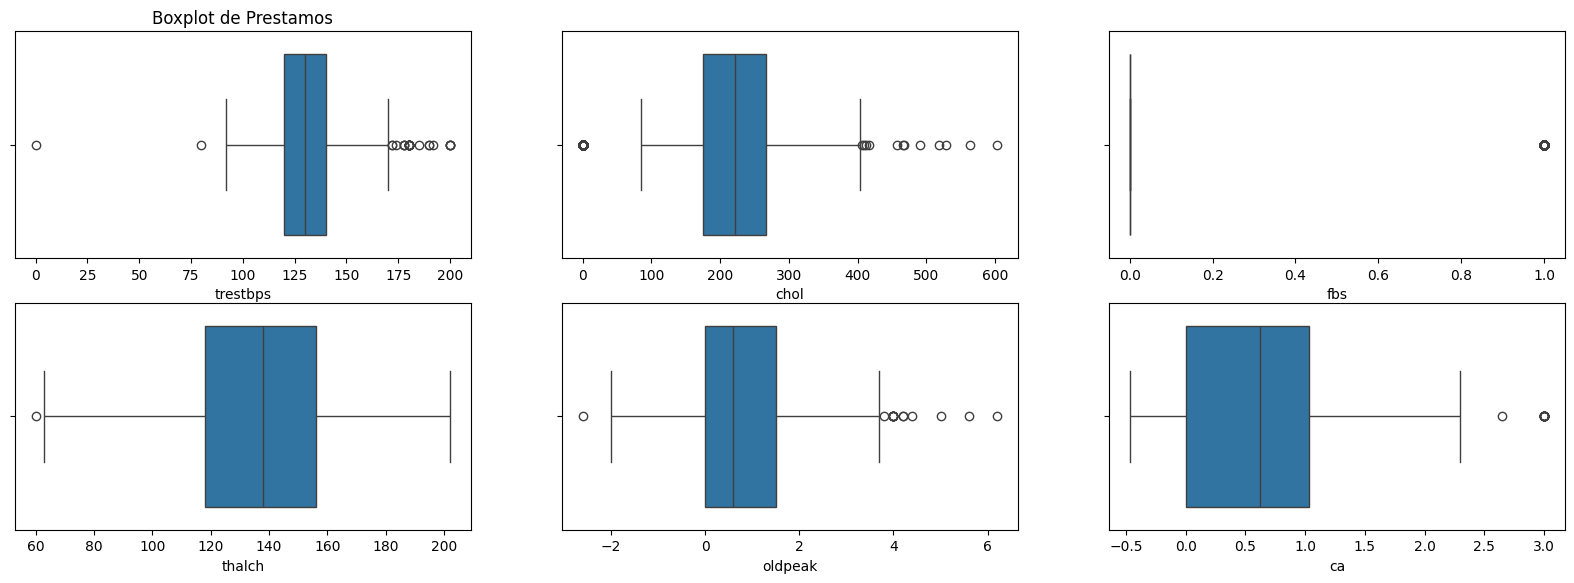

In [32]:
plt.figure(figsize=(20,10))

plt.subplot(3, 3, 1)
sns.boxplot(x=df_imputado['trestbps'])
plt.title('Boxplot de Prestamos')
plt.xlabel('trestbps')

plt.subplot(3,3,2)
sns.boxplot(x=df_imputado['chol'])
plt.xlabel('chol')

plt.subplot(3,3,3)
sns.boxplot(x=df_imputado['fbs'])
plt.xlabel('fbs')

plt.subplot(3,3,4)
sns.boxplot(x=df_imputado['thalch'])
plt.xlabel('thalch')

plt.subplot(3,3,5)
sns.boxplot(x=df_imputado['oldpeak'])
plt.xlabel('oldpeak')

plt.subplot(3,3,6)
sns.boxplot(x=df_imputado['ca'])
plt.xlabel('ca')

plt.show()

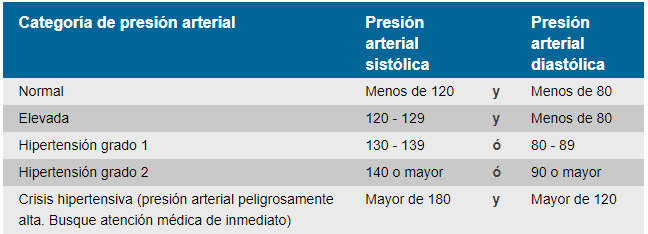

Recuperado de : https://medlineplus.gov/spanish/highbloodpressure.html

In [33]:
df_1 = df_imputado.query('trestbps != 0')
df_1 = df_imputado.query('chol != 0')

Eliminamos los outliers con presion arterial 0

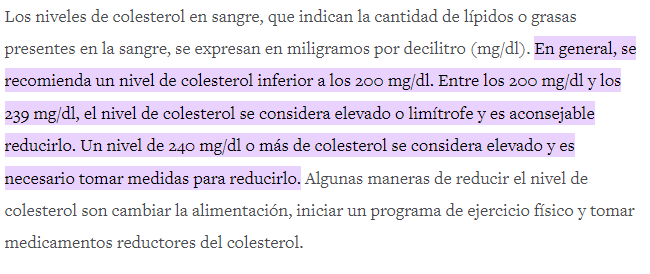

Recuperado de : https://www.texasheart.org/heart-health/heart-information-center/topics/colesterol/#:~:text=En%20general%2C%20se%20recomienda%20un,necesario%20tomar%20medidas%20para%20reducirlo.

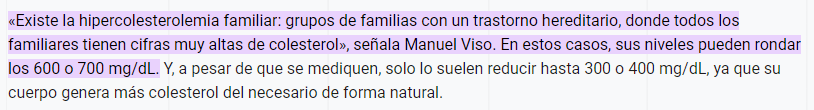

Recuperado de : https://imqsanrafael.es/por-que-sube-el-colesterol-si-no-como-grasas/#:~:text=%C2%ABExiste%20la%20hipercolesterolemia%20familiar%3A%20grupos,600%20o%20700%20mg%2FdL.

In [34]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,748.0,407.774064,266.774247,1.000000,187.7500,374.500000,561.25,920.0
age,748.0,52.883690,9.496063,28.000000,46.0000,54.000000,59.00,77.0
trestbps,748.0,133.031505,17.290076,92.000000,120.0000,130.000000,140.00,200.0
chol,748.0,244.506410,58.873517,85.000000,207.2061,236.909069,275.00,603.0
fbs,748.0,0.163102,0.369706,0.000000,0.0000,0.000000,0.00,1.0
thalch,748.0,139.703316,24.830733,69.000000,120.0000,140.000000,160.00,202.0
exang,748.0,0.347594,0.476525,0.000000,0.0000,0.000000,1.00,1.0
oldpeak,748.0,0.905749,1.071895,0.000000,0.0000,0.521441,1.50,6.2
ca,748.0,0.652086,0.746264,-0.467855,0.0000,0.474480,1.00,3.0
num,748.0,0.834225,1.102173,0.000000,0.0000,0.000000,1.00,4.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

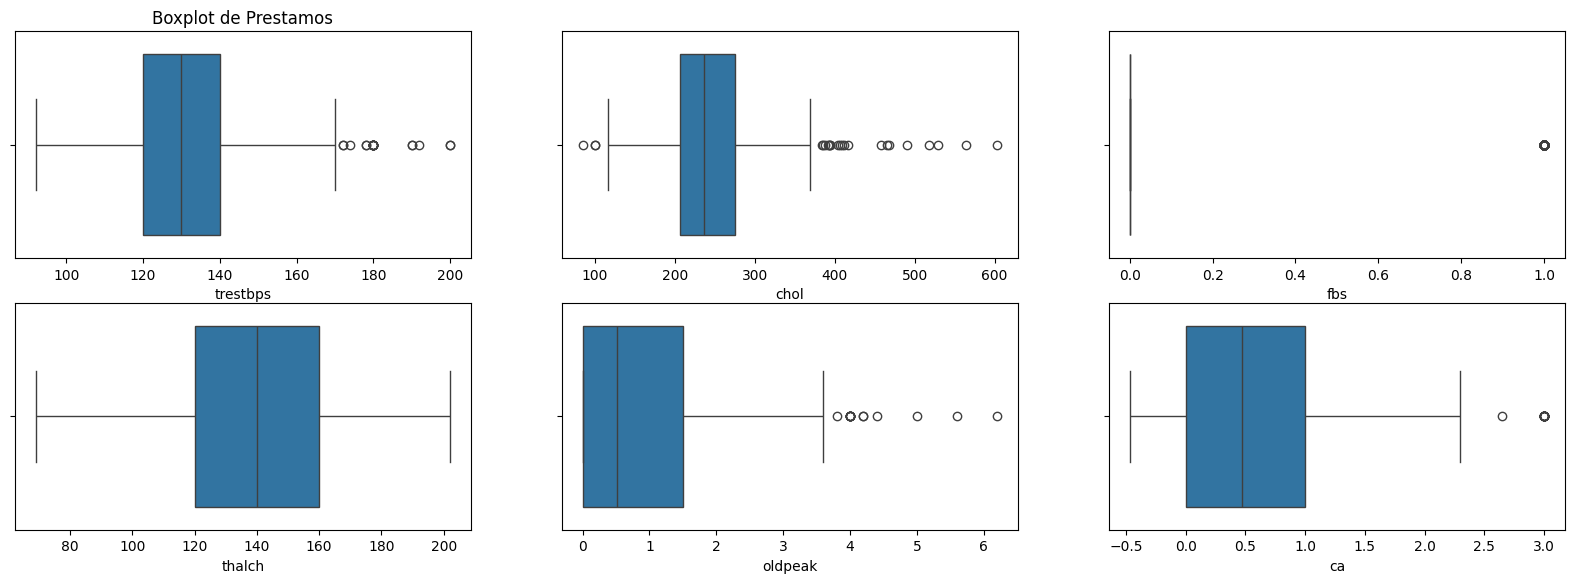

In [35]:
plt.figure(figsize=(20,10))

plt.subplot(3, 3, 1)
sns.boxplot(x=df_1['trestbps'])
plt.title('Boxplot de Prestamos')
plt.xlabel('trestbps')

plt.subplot(3,3,2)
sns.boxplot(x=df_1['chol'])
plt.xlabel('chol')

plt.subplot(3,3,3)
sns.boxplot(x=df_1['fbs'])
plt.xlabel('fbs')

plt.subplot(3,3,4)
sns.boxplot(x=df_1['thalch'])
plt.xlabel('thalch')

plt.subplot(3,3,5)
sns.boxplot(x=df_1['oldpeak'])
plt.xlabel('oldpeak')

plt.subplot(3,3,6)
sns.boxplot(x=df_1['ca'])
plt.xlabel('ca')

plt.show()

COMENTARIO OUTLIERS

Se eliminaron los valores de presion arterial 0, ya que no es posible esa medida en el ser humano, ademas se eliminaron los niveles de colesterol 0 ya que estos tampoco son reales.

Loa valores atipicos de colesterol muy altos no los eliminamos ya que hay casos con colesterol por  soble los 600.

Los otros valores atipicos de las otras columnas se dejaron ya que no encontre literatura que pudiera aclararme si esos valores eran errados o no lo eran.

In [36]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 748 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        748 non-null    float64
 1   age       748 non-null    float64
 2   sex       748 non-null    object 
 3   dataset   748 non-null    object 
 4   cp        748 non-null    object 
 5   trestbps  748 non-null    float64
 6   chol      748 non-null    float64
 7   fbs       748 non-null    int64  
 8   restecg   748 non-null    object 
 9   thalch    748 non-null    float64
 10  exang     748 non-null    int64  
 11  oldpeak   748 non-null    float64
 12  slope     748 non-null    object 
 13  ca        748 non-null    float64
 14  thal      748 non-null    object 
 15  num       748 non-null    float64
dtypes: float64(8), int64(2), object(6)
memory usage: 99.3+ KB


Realizaremos algunas agrupacion en base a la variable 'num' que es la variable objetiov segun el dataset de Kaggle.

Esta variable es una variable multiclase ya que sus valores son 0, 1, 2, 3, 4 que al parecer representa diferentes niveles de enfermedad cardíaca o quizás diferentes diagnósticos relacionados.

Interpretaciones posibles:

Niveles de severidad: Cada número podría representar un nivel de severidad de la enfermedad cardíaca, donde 0 indica ausencia de la enfermedad y valores más altos indican niveles de gravedad crecientes.

Diferentes diagnósticos: Los diferentes valores podrían corresponder a distintos diagnósticos relacionados con el corazón, no necesariamente todos clasificados como "enfermedad cardíaca".

Resultados de algún test: Podría ser un código numérico que representa los resultados de un test específico relacionado con la salud cardíaca.

In [37]:
# 1. Agrupación por sexo y presencia de enfermedad cardíaca y cálculo de conteos
grouped_data = df_1.groupby(['sex', 'num']).size().reset_index(name='count')
grouped_data



,sex,num,count
0,Female,0.0,143
1,Female,1.0,24
2,Female,2.0,7
3,Female,3.0,7
4,Female,4.0,2
5,Male,0.0,248
6,Male,1.0,179
7,Male,2.0,56
8,Male,3.0,62
9,Male,4.0,20


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

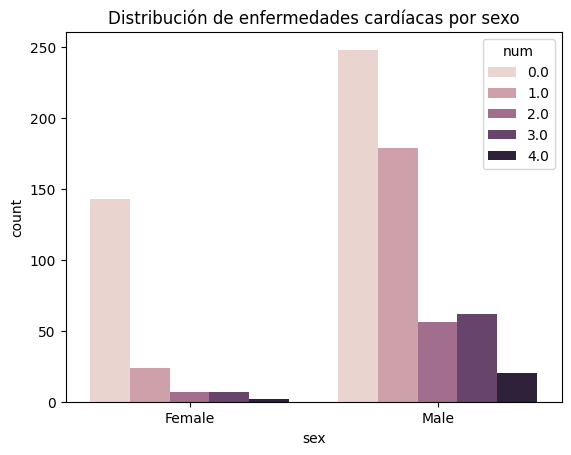

In [38]:
# Creación del gráfico de barras
sns.barplot(x='sex', y='count', hue='num', data=grouped_data)
plt.title('Distribución de enfermedades cardíacas por sexo')
plt.show()

COMENTARIO DEL GRAFICO

Este gráfico sugiere que existe una diferencia en la prevalencia y distribución de la enfermedad cardíaca entre hombres y mujeres en el conjunto de datos. Los hombres parecen tener una mayor incidencia de niveles más altos de enfermedad cardíaca en comparación con las mujeres.

In [39]:
# Agrupación por nivel de severidad y cálculo del promedio de edad
grouped_data = df_1.groupby('num')['age'].mean().reset_index()
grouped_data

,num,age
0,0.0,50.168798
1,1.0,52.871921
2,2.0,59.809524
3,3.0,59.391304
4,4.0,61.000000


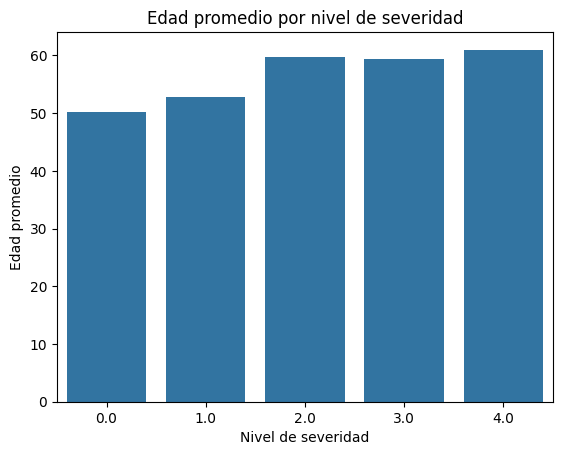

In [40]:
# Gráfico de barras
sns.barplot(x='num', y='age', data=grouped_data)
plt.title('Edad promedio por nivel de severidad')
plt.xlabel('Nivel de severidad')
plt.ylabel('Edad promedio')
plt.show()

COMENTARIO DEL GRAFICO

Este gráfico sugiere una fuerte asociación entre la edad y la severidad de la enfermedad cardíaca en el conjunto de datos. Los pacientes mayores tienden a tener niveles de severidad más altos

In [41]:
# Agrupación por nivel de severidad y cálculo de la edad promedio
grouped_data = df_1.groupby('num')[['age', 'trestbps', 'chol']].mean().reset_index()
grouped_data

,num,age,trestbps,chol
0,0.0,50.168798,130.152562,238.519906
1,1.0,52.871921,134.726092,254.031271
2,2.0,59.809524,136.584898,248.887995
3,3.0,59.391304,138.433776,247.486398
4,4.0,61.000000,141.442640,241.120836


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


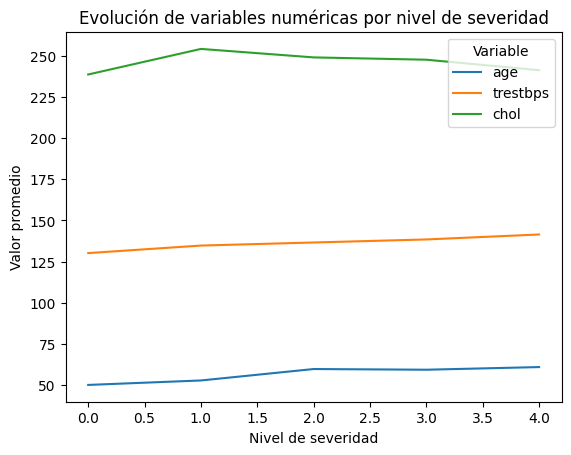

In [42]:
# Gráfico de líneas para visualizar la tendencia de las variables numéricas
sns.lineplot(x='num', y='value', hue='variable', data=pd.melt(grouped_data, id_vars=['num']))
plt.title('Evolución de variables numéricas por nivel de severidad')
plt.xlabel('Nivel de severidad')
plt.ylabel('Valor promedio')
plt.legend(title='Variable')
plt.show()

COMENTARIO DEL GRAFICO

La edad es un factor de riesgo importante: Los pacientes mayores tienden a tener niveles de severidad más altos.

La presión arterial podría ser un factor de riesgo asociado: Los niveles de presión arterial tienden a aumentar con la severidad de la enfermedad.

El colesterol no muestra una relación clara con la severidad: Al menos en este conjunto de datos, el colesterol no parece ser un factor determinante en la progresión de la enfermedad.

In [43]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 748 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        748 non-null    float64
 1   age       748 non-null    float64
 2   sex       748 non-null    object 
 3   dataset   748 non-null    object 
 4   cp        748 non-null    object 
 5   trestbps  748 non-null    float64
 6   chol      748 non-null    float64
 7   fbs       748 non-null    int64  
 8   restecg   748 non-null    object 
 9   thalch    748 non-null    float64
 10  exang     748 non-null    int64  
 11  oldpeak   748 non-null    float64
 12  slope     748 non-null    object 
 13  ca        748 non-null    float64
 14  thal      748 non-null    object 
 15  num       748 non-null    float64
dtypes: float64(8), int64(2), object(6)
memory usage: 99.3+ KB


In [44]:
correlation_matrix = df_imputado[["age","trestbps","chol","fbs","thalch","exang",
                                  "oldpeak","ca","num"]].corr(method='pearson')

print('\nCorrelación de Pearson: ')
print(correlation_matrix)


Correlación de Pearson: 
               age  trestbps      chol       fbs    thalch     exang  \
age       1.000000  0.255053 -0.091309  0.219915 -0.388086  0.160910   
trestbps  0.255053  1.000000  0.099903  0.161437 -0.116791  0.136465   
chol     -0.091309  0.099903  1.000000  0.086006  0.227202 -0.032483   
fbs       0.219915  0.161437  0.086006  1.000000 -0.064898 -0.003475   
thalch   -0.388086 -0.116791  0.227202 -0.064898  1.000000 -0.307872   
exang     0.160910  0.136465 -0.032483 -0.003475 -0.307872  1.000000   
oldpeak   0.263955  0.167478  0.051425  0.067552 -0.163636  0.368653   
ca        0.581698  0.104541 -0.133356  0.210364 -0.341484  0.231013   
num       0.339596  0.126096 -0.233097  0.129539 -0.372838  0.350567   

           oldpeak        ca       num  
age       0.263955  0.581698  0.339596  
trestbps  0.167478  0.104541  0.126096  
chol      0.051425 -0.133356 -0.233097  
fbs       0.067552  0.210364  0.129539  
thalch   -0.163636 -0.341484 -0.372838  
exang  

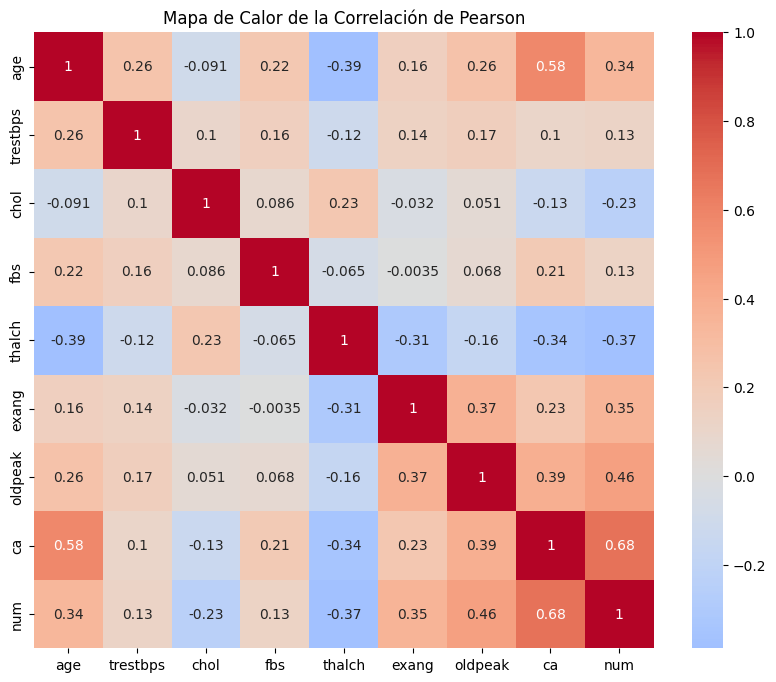

In [45]:
# Crear mapas de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

COMENTARIO DEL MAPA DE CALOR

Correlación positiva fuerte:

ca (número de vasos sanguíneos principales con enfermedad) y num (nivel de severidad de la enfermedad): Existe una fuerte correlación positiva entre estas dos variables, lo que indica que a medida que aumenta el número de vasos sanguíneos con enfermedad, también aumenta el nivel de severidad de la enfermedad cardíaca.

oldpeak (depresión ST inducida por el ejercicio en relación con el reposo) y num: Existe una correlación positiva moderada entre estas dos variables, lo que sugiere que a medida que aumenta la depresión del segmento ST, también aumenta el nivel de severidad de la enfermedad.

Correlación negativa:

thalch (frecuencia cardíaca máxima alcanzada) y age: Existe una correlación negativa moderada entre estas dos variables, lo que indica que a medida que aumenta la edad, tiende a disminuir la frecuencia cardíaca máxima.

# PREPROCESAMIENTO

In [46]:
df_1.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.0,63.0,Male,Cleveland,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect,0.0
1,2.0,67.0,Male,Cleveland,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,normal,2.0
2,3.0,67.0,Male,Cleveland,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable defect,1.0
3,4.0,37.0,Male,Cleveland,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0.0
4,5.0,41.0,Female,Cleveland,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0.0


In [47]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 748 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        748 non-null    float64
 1   age       748 non-null    float64
 2   sex       748 non-null    object 
 3   dataset   748 non-null    object 
 4   cp        748 non-null    object 
 5   trestbps  748 non-null    float64
 6   chol      748 non-null    float64
 7   fbs       748 non-null    int64  
 8   restecg   748 non-null    object 
 9   thalch    748 non-null    float64
 10  exang     748 non-null    int64  
 11  oldpeak   748 non-null    float64
 12  slope     748 non-null    object 
 13  ca        748 non-null    float64
 14  thal      748 non-null    object 
 15  num       748 non-null    float64
dtypes: float64(8), int64(2), object(6)
memory usage: 99.3+ KB


In [48]:
df_1 = df_1.reset_index(drop=True)

In [49]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        748 non-null    float64
 1   age       748 non-null    float64
 2   sex       748 non-null    object 
 3   dataset   748 non-null    object 
 4   cp        748 non-null    object 
 5   trestbps  748 non-null    float64
 6   chol      748 non-null    float64
 7   fbs       748 non-null    int64  
 8   restecg   748 non-null    object 
 9   thalch    748 non-null    float64
 10  exang     748 non-null    int64  
 11  oldpeak   748 non-null    float64
 12  slope     748 non-null    object 
 13  ca        748 non-null    float64
 14  thal      748 non-null    object 
 15  num       748 non-null    float64
dtypes: float64(8), int64(2), object(6)
memory usage: 93.6+ KB


In [50]:
columna_a_eliminar = ["id","dataset"]
df_1 = df_1.drop(columna_a_eliminar, axis=1)

In [51]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       748 non-null    float64
 1   sex       748 non-null    object 
 2   cp        748 non-null    object 
 3   trestbps  748 non-null    float64
 4   chol      748 non-null    float64
 5   fbs       748 non-null    int64  
 6   restecg   748 non-null    object 
 7   thalch    748 non-null    float64
 8   exang     748 non-null    int64  
 9   oldpeak   748 non-null    float64
 10  slope     748 non-null    object 
 11  ca        748 non-null    float64
 12  thal      748 non-null    object 
 13  num       748 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 81.9+ KB


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample

In [53]:
df_1['num'].value_counts()

,count
num,
0.0,391
1.0,203
3.0,69
2.0,63
4.0,22


In [54]:
# La columna 'num' tiene valores continuos (0, 1, 2, 3, 4) que representan el grado de la enfermedad.
# Vamos a convertirlo en binario: 0 para 'no enfermedad' y 1 para 'sí enfermedad'.
df_1['num'] = df_1['num'].apply(lambda x: 1 if x > 0 else 0)

In [55]:
# Vericamos la distribicion para asegurarnmos que es binaria
df_1['num'].value_counts()

,count
num,
0,391
1,357


In [56]:
# Codificación de variables categóricas
# Utilizamos LabelEncoder para las columnas categóricas
categorical_columns = ['sex', 'cp', 'restecg', 'slope', 'thal']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_1[col] = le.fit_transform(df_1[col])
    label_encoders[col] = le  # Guardar el encoder por si es necesario revertir el proceso más tarde

In [57]:
# separar las variables X,y
X = df_1.drop(['num'], axis=1)
y = df_1['num']

In [58]:
# Dividir en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [59]:
# Normalizar las variables numéricas (StandardScaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implementacion de MLP con Dropout

In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [61]:
# Crear una red MLP con dos capas ocultas

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32,activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') # capa de salida, 1 neurona para salida binaria
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
# Implementar early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [64]:
# visualziar el modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

# Entrenamiento del Modelo

In [65]:
# Entrenar el modelo con early stopping

history = model.fit(
    X_train, y_train,
    validation_split=0.2, # % de entrenamiento para la validacion
    epochs=100,  # Epocas maximas
    batch_size=32, #Tamaño del lote
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5511 - loss: 0.7064 - val_accuracy: 0.8000 - val_loss: 0.5865
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7019 - loss: 0.6160 - val_accuracy: 0.8571 - val_loss: 0.5236
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7640 - loss: 0.5363 - val_accuracy: 0.8667 - val_loss: 0.4805
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7982 - loss: 0.5044 - val_accuracy: 0.8667 - val_loss: 0.4423
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8156 - loss: 0.4643 - val_accuracy: 0.8762 - val_loss: 0.4170
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8225 - loss: 0.4214 - val_accuracy: 0.8762 - val_loss: 0.4012
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8068 - loss: 0.4408 - val_accuracy: 0.8667 - val_loss: 0.3909
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8137 - loss: 0.4620 - val_accuracy: 0.8667 - 

In [66]:
import matplotlib.pyplot as plt

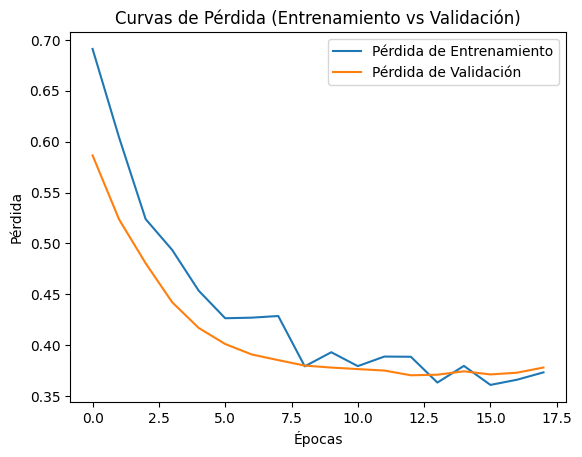

In [67]:
# Pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curvas de Pérdida (Entrenamiento vs Validación)')
plt.legend()
plt.show()

COMENTARIO

La pérdida tanto en el conjunto de entrenamiento como en el de validación disminuye rápidamente al inicio, lo que indica que el modelo está aprendiendo bien.

Después de algunas épocas, las curvas de pérdida se estabilizan, lo que sugiere que el modelo no está sobreajustando (overfitting) significativamente. Esto es un buen indicativo de que el Dropout está funcionando como una técnica de regularización efectiva.
Sin embargo, se nota un pequeño aumento en la pérdida del conjunto de validación en las últimas épocas. Esto puede deberse a la variabilidad introducida por el Dropout, lo que a su vez sugiere que el modelo podría seguir mejorando con ajustes adicionales en las épocas o en el tamaño del Dropout

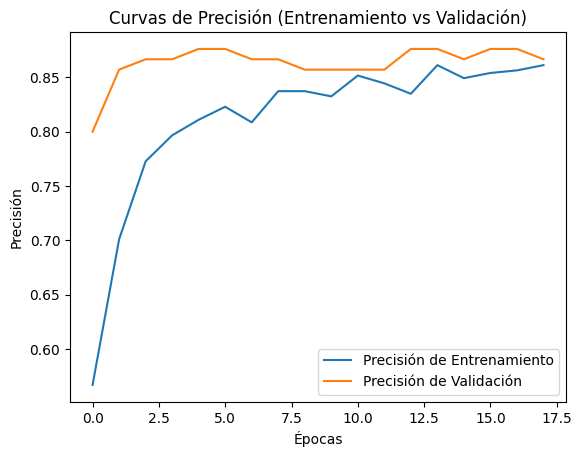

In [68]:
# Precisión de entrenamiento y validación
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Curvas de Precisión (Entrenamiento vs Validación)')
plt.legend()
plt.show()

COMENTARIO

La precisión tanto en el conjunto de entrenamiento como en el de validación aumenta constantemente y se estabiliza después de algunas épocas.

La precisión de entrenamiento se mantiene ligeramente por encima de la precisión de validación. Esto es esperado en un modelo con Dropout, ya que la red se ve forzada a no depender en exceso de ciertas neuronas, mejorando la capacidad de generalización.

La precisión final es bastante alta para ambos conjuntos, lo que sugiere que el modelo con Dropout es robusto y tiene un buen rendimiento general.

# Evaluacion del Modelo

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [70]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Precisión en el conjunto de prueba: {test_accuracy:.4f}')

Precisión en el conjunto de prueba: 0.8489


In [71]:
# Realizar predicciones en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convertir probabilidades a 0 y 1

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


Precision del Modelo: 0.8489
Classification report for MLP
               precision    recall  f1-score   support

No enfermedad       0.85      0.86      0.86       118
   Enfermedad       0.85      0.83      0.84       107

     accuracy                           0.85       225
    macro avg       0.85      0.85      0.85       225
 weighted avg       0.85      0.85      0.85       225



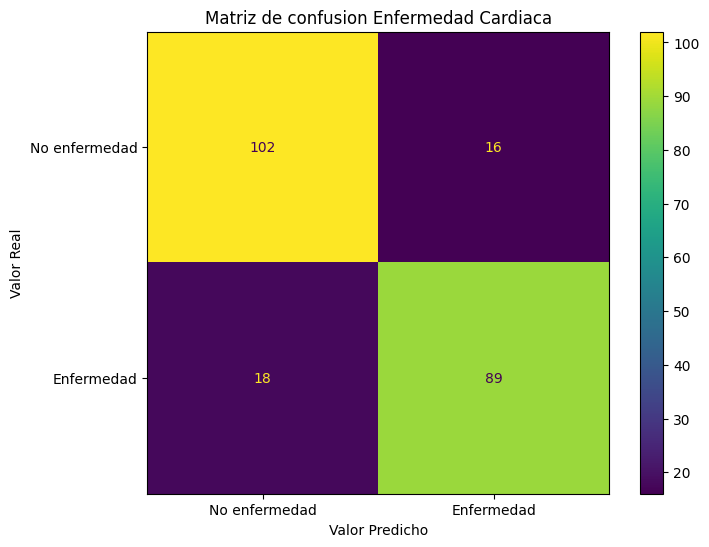

In [72]:
# Definir etiquetas para que aparezcan como "Benigno" y "Maligno"
target_names = ['No enfermedad', 'Enfermedad']

cm=confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precision del Modelo: {accuracy:.4f}')
print("Classification report for MLP")
print(classification_report(y_test, y_pred, target_names=target_names))

cm2=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion Enfermedad Cardiaca')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

# Implementacion de MLP sin Dropout

In [73]:
# Creación del modelo MLP básico sin Dropout
basic_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Primera capa oculta con 32 neuronas
    Dense(16, activation='relu'),  # Segunda capa oculta con 16 neuronas
    Dense(1, activation='sigmoid')  # Capa de salida con 1 neurona para la predicción binaria
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
# Compilación del modelo
basic_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
# Entrenamiento del modelo sin Dropout ni EarlyStopping
history_basic = basic_model.fit(
    X_train, y_train,
    validation_split=0.2,   # Validación durante el entrenamiento
    epochs=100,                      # Entrenar por 100 épocas para ver si hay overfitting
    batch_size=32,                   # Tamaño del batch
    verbose=1                        # Mostrar el progreso del entrenamiento
)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5364 - loss: 0.6915 - val_accuracy: 0.7048 - val_loss: 0.6155
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7124 - loss: 0.6129 - val_accuracy: 0.7810 - val_loss: 0.5569
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7705 - loss: 0.5652 - val_accuracy: 0.7905 - val_loss: 0.5114
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7956 - loss: 0.5190 - val_accuracy: 0.8000 - val_loss: 0.4743
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8307 - loss: 0.4806 - val_accuracy: 0.8000 - val_loss: 0.4455
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8123 - loss: 0.4648 - val_accuracy: 0.8190 - val_loss: 0.4273
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8101 - loss: 0.4569 - val_accuracy: 0.8381 - val_loss: 0.4187
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8555 - loss: 0.4131 - val_accuracy: 0.8381 - 

In [76]:
# Evaluación del modelo MLP básico
y_pred_basic = basic_model.predict(X_test)
y_pred_basic = (y_pred_basic > 0.5).astype(int)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Precision del Modelo: 0.8711
Classification report for MLP
               precision    recall  f1-score   support

No enfermedad       0.87      0.89      0.88       118
   Enfermedad       0.88      0.85      0.86       107

     accuracy                           0.87       225
    macro avg       0.87      0.87      0.87       225
 weighted avg       0.87      0.87      0.87       225



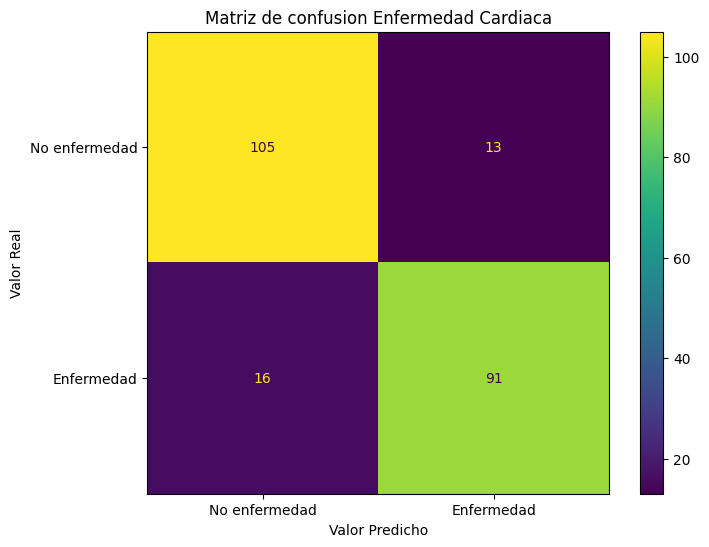

In [77]:
# Definir etiquetas para que aparezcan como "Benigno" y "Maligno"
target_names = ['No enfermedad', 'Enfermedad']

cm=confusion_matrix(y_test,y_pred_basic)
accuracy = accuracy_score(y_test, y_pred_basic)
print(f'Precision del Modelo: {accuracy:.4f}')
print("Classification report for MLP")
print(classification_report(y_test, y_pred_basic, target_names=target_names))

cm2=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax=plt.subplots(figsize=(8,6))
cm2.plot(ax=ax)
plt.title('Matriz de confusion Enfermedad Cardiaca')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

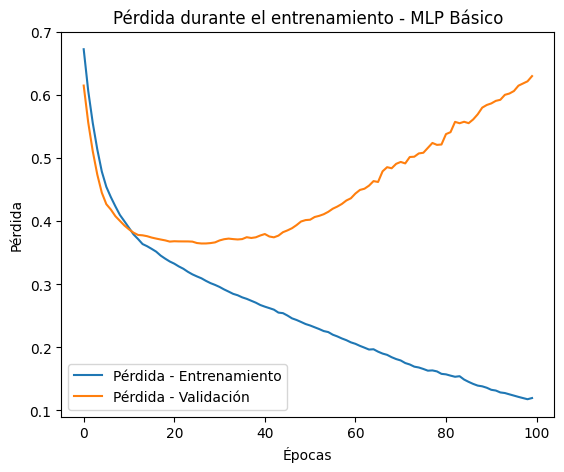

In [78]:
# Visualización de la evolución del entrenamiento para el modelo básico
plt.figure(figsize=(14, 5))

# Evolución de la pérdida
plt.subplot(1, 2, 1)
plt.plot(history_basic.history['loss'], label='Pérdida - Entrenamiento')
plt.plot(history_basic.history['val_loss'], label='Pérdida - Validación')
plt.title('Pérdida durante el entrenamiento - MLP Básico')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

COMENTARIO

Se observa que la pérdida en el conjunto de entrenamiento disminuye rápidamente y continúa bajando incluso después de muchas épocas, mientras que la pérdida en el conjunto de validación comienza a aumentar después de cierto punto (Alrededor de las epocas 20-30)

Este comportamiento indica que el modelo sin Dropout está comenzando a sobreajustarse (overfitting) al conjunto de entrenamiento. En otras palabras, el modelo está aprendiendo demasiado bien los patrones del conjunto de entrenamiento, pero no logra generalizar bien al conjunto de validación.

La curva de pérdida de validación es más alta que la de entrenamiento, lo que confirma este sobreajuste.

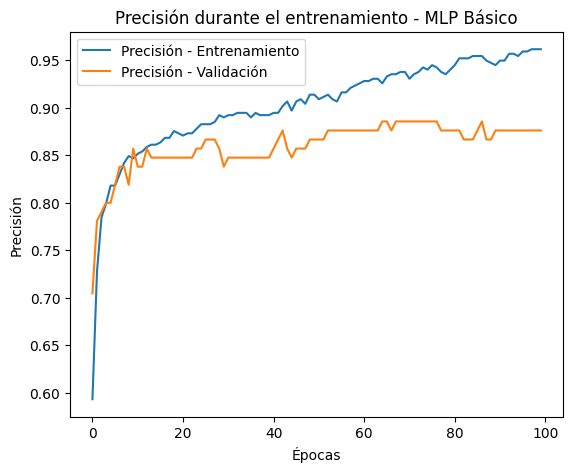

In [79]:
# Evolución de la precisión
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history_basic.history['accuracy'], label='Precisión - Entrenamiento')
plt.plot(history_basic.history['val_accuracy'], label='Precisión - Validación')
plt.title('Precisión durante el entrenamiento - MLP Básico')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

COMENTARIO

La precisión en el conjunto de entrenamiento sigue aumentando y eventualmente alcanza un nivel cercano al 100%. Esto es una señal clara de sobreajuste.

La precisión de validación, sin embargo, se estabiliza y no logra seguir el ritmo de la precisión de entrenamiento, permaneciendo más baja.

A medida que las épocas progresan, la diferencia entre las precisiones de entrenamiento y validación se hace más grande. Esto también respalda la idea de que el modelo sin Dropout se está sobreajustando, ya que no logra mantener la precisión de validación.

# COMENTARIO FINAL

Modelo con Dropout:

El Dropout ayuda a evitar el sobreajuste al conjunto de entrenamiento.

La pérdida y precisión de validación se mantienen estables, lo que sugiere que el modelo generaliza mejor.

Modelo sin Dropout:

Tiende a sobreajustarse, ya que la precisión de entrenamiento sigue aumentando mientras que la de validación no.

La diferencia en la pérdida entre entrenamiento y validación también indica que el modelo no generaliza bien.